<a href="https://colab.research.google.com/github/ABHIRAM199/my_practice/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting

**Agenda**

* Introduction to Time-Series data
* Data Setup
* Understanding Components of Time Series
* Exploratory Data Analysis
* Introduction to Forecasting Techniques
* Autoregressive Integrated Moving Average (ARIMA)
* Model Evaluation and Validation
* Seasonal ARIMA (SARIMA) Model
* Advanced Techniques

# Introduction to Time-Series data

**What is a Time Series?**

A time series is a sequence of data points collected, recorded, or measured at successive, evenly-spaced time intervals.

* Each data point represents observations or measurements taken over time, such as stock prices, temperature readings, or sales figures. Time series data is commonly represented graphically with time on the horizontal axis and the variable of interest on the vertical axis, allowing analysts to identify trends, patterns, and changes over time.

* Time series data is a fundamental concept in many fields, offering a dynamic perspective on how things change over time.  Imagine a river constantly flowing, forever changing yet exhibiting patterns , time series data is similar. It captures these changes by recording data points at consistent intervals, forming a chronological sequence.

* Time Series Analysis is a specific way of analyzing a sequence of data points collected over time. In TSA, analysts record data points at consistent intervals over a set period rather than just recording the data points intermittently or randomly.


**Core Characteristics**:
* **Sequential Nature:**  The defining feature of time series data is its sequential nature. Data points are collected at regular intervals, like hourly, daily, weekly, or even monthly. This consistency allows for comparisons and trend analysis across these time steps.

* **Ordered Dependence:**  Data points within a time series can be interrelated. The value at a specific time might be influenced by the values that came before it. For instance, today's sales figures could be impacted by a marketing campaign launched last week.

* **Time-stamped Data:**  Each data point in a time series is associated with a specific time stamp, indicating the exact moment when it was collected. This time stamp is crucial for establishing the chronological order and understanding the sequence of events.

**Basic working of TSA**

TSA is the backbone for prediction and forecasting analysis, specific to time-based problem statements. The very basic outline of TSA is -

* Analyzing the historical dataset and its patterns
* Understanding and matching the current situation with patterns derived from the previous stage.
* Understanding the factor or factors influencing certain variable(s) in different periods.

**Importance of TSA**
* **Forecasting**: Predicting any value for the future.
* **Segmentation**: Grouping similar items together.
* **Classification**: Classifying a set of items into given classes.
* **Descriptive analysis**: Analysis of a given dataset to find out what is there in it.
* **Intervention analysis**: Effect of changing a given variable on the outcome.
* **Predict Future Trends**: Time series analysis enables the prediction of future trends, allowing businesses to anticipate market demand, stock prices, and other key variables, facilitating proactive decision-making.
* **Detect Patterns and Anomalies**: By examining sequential data points, time series analysis helps detect recurring patterns and anomalies, providing insights into underlying behaviors and potential outliers.
* **Risk Mitigation**: By spotting potential risks, businesses can develop strategies to mitigate them, enhancing overall risk management.
* **Strategic Planning**: Time series insights inform long-term strategic planning, guiding decision-making across finance, healthcare, and other sectors.
* **Competitive Edge**: Time series analysis enables businesses to optimize resource allocation effectively, whether it’s inventory, workforce, or financial assets. By staying ahead of market trends, responding to changes, and making data-driven decisions, businesses gain a competitive edge.




Before further diving into TSA, let's take a look at MARUTI dataset.

# Setup

* Importing necessary libraries

In [ ]:
# Importing required modules
import pandas as pd
import numpy as np               # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
import datetime as dt
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline

import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")


# Settings for pretty nice plots
plt.style.use('fivethirtyeight')
plt.show()

[Download the dataset from here](https://drive.google.com/file/d/18RSRNmZlsqahuO2ZHlnCVt2fIfnltbHY/view?usp=sharing)

### Stock-Price Time Series


In [ ]:
df = pd.read_csv("/content/MARUTI.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118


In [ ]:
# For the sake of this notebook, limit the number of columns to keep things simple.

data = df[['Date','Open','High','Low','Close','Volume','VWAP']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4427 entries, 0 to 4426
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4427 non-null   object 
 1   Open    4427 non-null   float64
 2   High    4427 non-null   float64
 3   Low     4427 non-null   float64
 4   Close   4427 non-null   float64
 5   Volume  4427 non-null   int64  
 6   VWAP    4427 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 242.2+ KB


It appears that the Date column is being treated as a string rather than as dates. To fix this, we’ll use the pandas to_datetime() feature which converts the arguments to dates.

In [ ]:
# Convert string to datetime64
data['Date'] = data['Date'].apply(pd.to_datetime)
data.head()

,Date,Open,High,Low,Close,Volume,VWAP
0,2003-07-09,164.90,170.40,155.00,164.30,35164283,165.95
1,2003-07-10,167.00,168.70,164.50,167.00,10464179,166.74
2,2003-07-11,167.75,174.85,166.25,173.35,11740117,172.45
3,2003-07-14,174.25,179.25,174.25,177.95,5982324,177.91
4,2003-07-15,200.00,200.00,173.00,176.20,6173689,176.88


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Volume']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Volume')

from matplotlib import pyplot as plt
_df_12['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

Now that our data has been converted into the desired format, let’s take a look at its various columns for further analysis.

* The Open and Close columns indicate the opening and closing price of the stocks on a particular day.
* The High and Low columns provide the highest and the lowest price for the stock on a particular day, respectively.
* The Volume column tells us the total volume of stocks traded on a particular day.
* The volume weighted average price (VWAP) is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price. It is important because it provides traders with insight into both the trend and value of a security.

### Pandas for time series analysis

As pandas was developed in the context of financial modeling, it contains a comprehensive set of tools for working with dates, times, and time-indexed data. Let’s look at the main pandas data structures for working with time series data.

### Manipulating datetime


Python's basic objects for working with dates and times reside in the built-in datetime module. In pandas, a single point in time is represented as a Timestamp and we can use datetime() function to create Timestamps from strings in a wide variety of date/time formats.

In [ ]:
from datetime import datetime
my_year = 2021
my_month = 4
my_day = 21
my_hour = 10
my_minute = 5
my_second = 30

We can now create a datetime object, and use it freely with pandas given the above attributes.

In [ ]:
test_date = datetime(my_year, my_month, my_day)
test_date

datetime.datetime(2021, 4, 21, 0, 0)

For the purposes of analyzing our particular data, we have selected only the day, month and year, but we could also include more details like hour, minute and second if necessary.

In [ ]:
test_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
print('The day is : ', test_date.day)
print('The hour is : ', test_date.hour)
print('The month is : ', test_date.month)

The day is :  21
The hour is :  10
The month is :  4


For our stock price dataset, the type of the index column is DatetimeIndex. We can use pandas to obtain the minimum and maximum dates in the data.

In [ ]:
print(data.index.max())
print(data.index.min())

4426
0


We can also calculate the latest date location and the earliest date index location as follows:

In [ ]:
# Earliest date index location
print('Earliest date index location is: ',data.index.argmin())

# Latest date location
print('Latest date location: ',data.index.argmax())

Earliest date index location is:  0
Latest date location:  4426


Now that we have setup our dataset, let's move forward and discuss the Components of Time Series.

## Understanding Components of Time Series



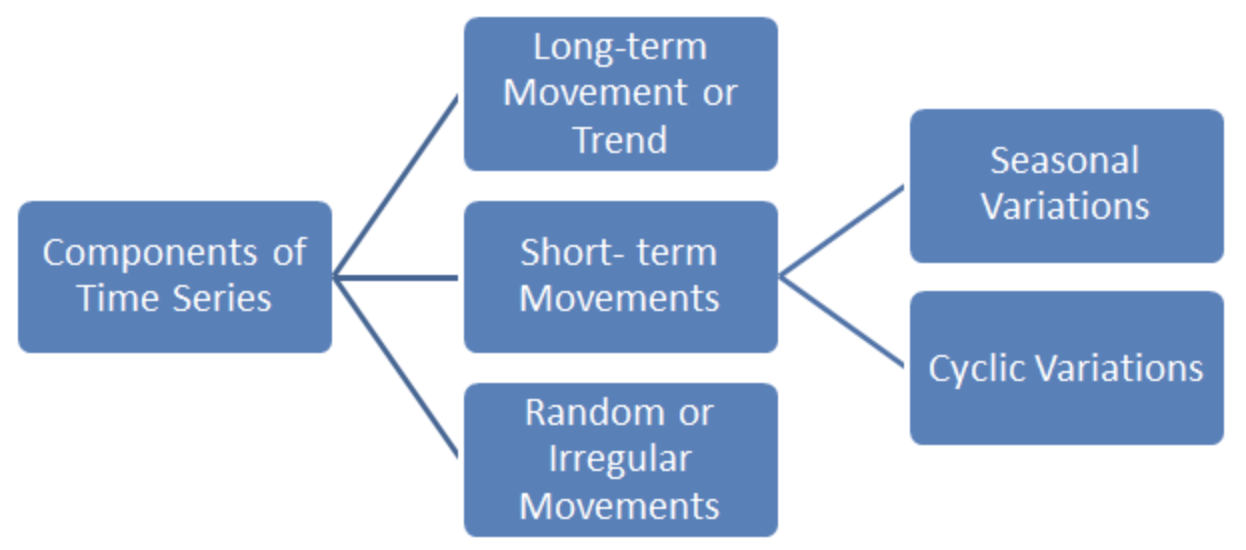




## Trend

* The trend shows the general tendency of the data to increase or decrease during a long period of time. A trend is a smooth, general, long-term, average tendency. It is not always necessary that the increase or decrease is in the same direction throughout the given period of time.
* It is observable that the tendencies may increase, decrease or are stable in different sections of time.  But the overall trend must be upward, downward or stable. The population, agricultural production, items manufactured, number of births and deaths, number of industry or any factory, number of schools or colleges are some of its example showing some kind of tendencies of movement.

**A Trend could be :**
* **Uptrend**: When Time Series Analysis shows a general pattern that is upward then it is Uptrend.
* **Downtrend**: When Time Series Analysis shows a pattern that is downward then it is Downtrend.
* **Horizontal or Stationary trend**: If no pattern observed then it is called a Horizontal or stationary trend.





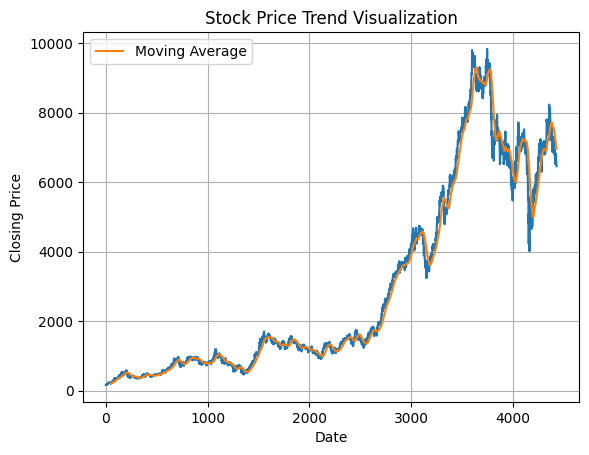

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Download or load your stock price data (replace with your data source)
data = pd.read_csv("/content/MARUTI.csv")  # Assuming 'Date' is the index

# Select the 'Close' price column (or adjust for your data)
close_prices = data["Close"]

# Plot the closing price time series
plt.plot(close_prices)

# Optional: Add labels and title
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price Trend Visualization")

# Calculate moving average (optional)
window_size = 50  # Adjust window size as needed
moving_average = close_prices.rolling(window=window_size).mean()

# Plot the moving average (optional)
plt.plot(moving_average, label='Moving Average')
plt.legend()  # Show labels for price and moving average

# Show the plot with gridlines
plt.grid(True)
plt.show()


## Seasonal Variations (Seasonality)

* These are the rhythmic forces which operate in a regular and periodic manner over a span of less than a year. They have the same or almost the same pattern during a period of 12 months. This variation will be present in a time series if the data are recorded hourly, daily, weekly, quarterly, or monthly.
* These variations come into play either because of the natural forces or man-made conventions. The various seasons or climatic conditions play an important role in seasonal variations. Such as production of crops depends on seasons, the sale of umbrella and raincoats in the rainy season, and the sale of electric fans and A.C. shoots up in summer seasons.


## Cyclic Variations

* The variations in a time series which operate themselves over a span of more than one year are the cyclic variations. This oscillatory movement has a period of oscillation of more than a year. One complete period is a cycle. This cyclic movement is sometimes called the ‘Business Cycle’.
* It is a four-phase cycle comprising of the phases of prosperity, recession, depression, and recovery. The cyclic variation may be regular are not periodic. The upswings and the downswings in business depend upon the joint nature of the economic forces and the interaction between them.





## Irregularity (Noise)

* Noise encompasses the residual variability in the data that the other components cannot explain. Noise includes unpredictable, erratic deviations after accounting for trends, seasonality, and cycles.
* These fluctuations may result from random events, measurement errors, or other unforeseen factors. Irregularity makes it challenging to identify and model the underlying patterns in the time series data.

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial initial step when working with any type of data, including time series data. It involves analyzing and visualizing the data to understand its key characteristics, uncover patterns, and identify potential issues before diving into more complex statistical modeling or machine learning tasks.


Here's how EDA plays a vital role in time series analysis:

**1. Understanding Trends and Seasonality:** Time series data naturally involves measurements collected over time. EDA helps visualize trends (upward, downward, or flat) and identify potential seasonality (cyclical patterns that repeat over a specific time period, such as daily, weekly, monthly, or yearly).

**2. Identifying Outliers and Missing Values:** Outliers are data points that deviate significantly from the overall trend. Missing values represent gaps in the data collection process. EDA helps detect these anomalies through various techniques like boxplots, z-scores, and time series plots.

**3. Data Cleaning and Feature Engineering:** EDA often reveals data quality issues like inconsistencies, errors, or inconsistencies in time stamps. You can address these issues through data cleaning techniques like data imputation, outlier handling, and time series transformations (e.g., differencing to remove trends).

**4. Guiding Model Selection and Evaluation:**Based on the insights gained from EDA, you can choose appropriate time series forecasting models (e.g., ARIMA, SARIMA, LSTM, etc.) that are suitable for the identified trends, seasonality, and other characteristics of your data.

## EDA in Time-Series

### Data Integrity / Quality

In [ ]:
import pandas as pd

# Assuming your data is in a CSV file named 'your_data.csv' (replace with your actual file path)
train = pd.read_csv("/content/MARUTI.csv")

# Now you can use 'train' for further analysis
print("missing_data:", train.isna().sum())
print("unique dates:", train.index.nunique())


missing_data: Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1971
Deliverable Volume       1
%Deliverble              1
dtype: int64
unique dates: 4427


### Time Series Visualization

Time series visualization is the graphical representation of data collected over successive time intervals. It encompasses various techniques such as line plots, seasonal subseries plots, autocorrelation plots, histograms, and interactive visualizations. These methods help analysts identify trends, patterns, and anomalies in time-dependent data for better understanding and decision-making.

* **Line Plots**: Line plots display data points over time, allowing easy observation of trends, cycles, and fluctuations.
* **Seasonal Plots**: These plots break down time series data into seasonal components, helping to visualize patterns within specific time periods.
* **Histograms and Density Plots**: Shows the distribution of data values over time, providing insights into data characteristics such as skewness and kurtosis.
* **Autocorrelation and Partial Autocorrelation Plots**: These plots visualize correlation between a time series and its lagged values, helping to identify seasonality and lagged relationships.
* **Spectral Analysis**: Spectral analysis techniques, such as periodograms and spectrograms, visualize frequency components within time series data, useful for identifying periodicity and cyclical patterns.
* **Decomposition Plots**: Decomposition plots break down a time series into its trend, seasonal, and residual components, aiding in understanding the underlying patterns.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/MARUTI.csv', parse_dates=['Date'], index_col='Date')

# Display the first few rows of the dataset
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4427 entries, 2003-07-09 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              4427 non-null   object 
 1   Series              4427 non-null   object 
 2   Prev Close          4427 non-null   float64
 3   Open                4427 non-null   float64
 4   High                4427 non-null   float64
 5   Low                 4427 non-null   float64
 6   Last                4427 non-null   float64
 7   Close               4427 non-null   float64
 8   VWAP                4427 non-null   float64
 9   Volume              4427 non-null   int64  
 10  Turnover            4427 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  4426 non-null   float64
 13  %Deliverble         4426 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 518.8+ KB


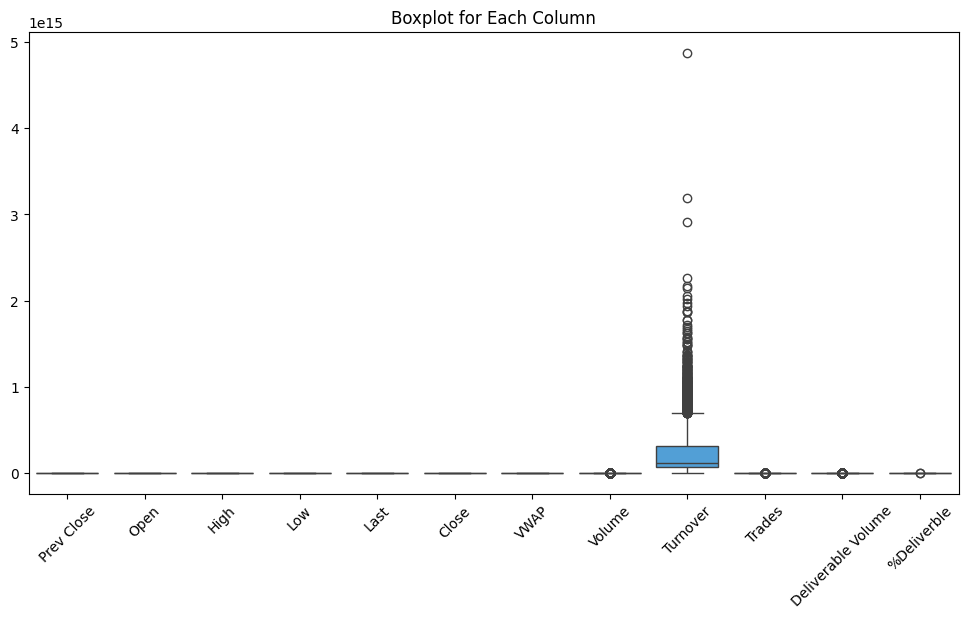

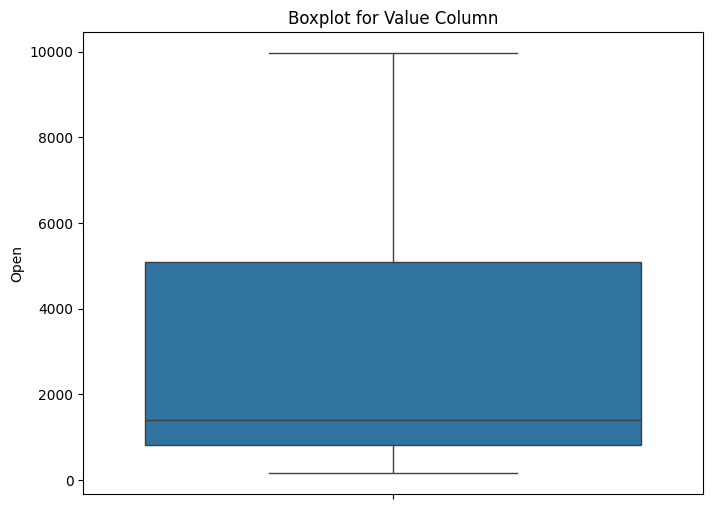

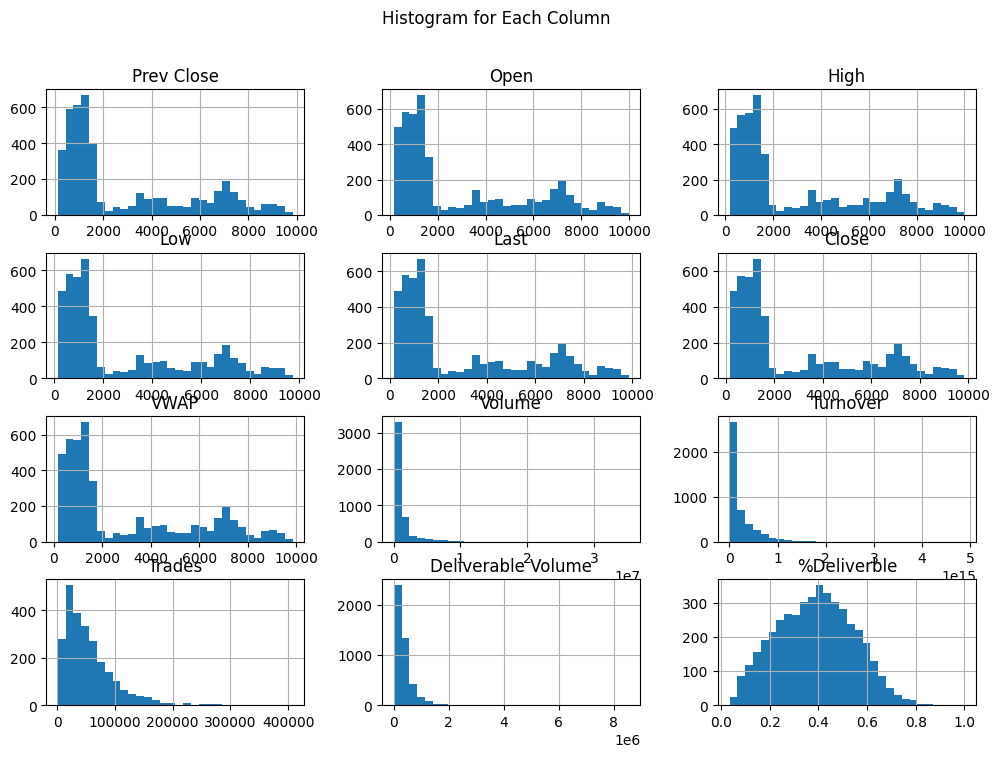

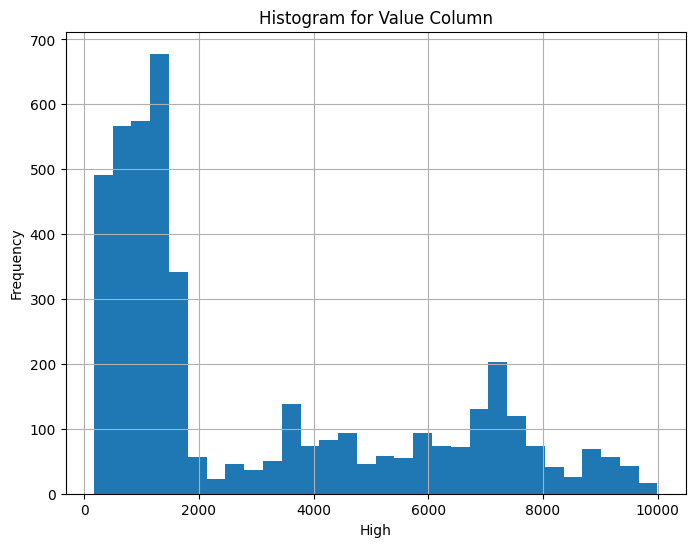

In [ ]:
# Boxplot for each column in the dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Boxplot for Each Column')
plt.xticks(rotation=45)
plt.show()

# Boxplot for a specific column (e.g., 'Open')
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['Open'])
plt.title('Boxplot for Value Column')
plt.show()

# Histogram for each column in the dataset
data.hist(figsize=(12, 8), bins=30)
plt.suptitle('Histogram for Each Column')
plt.show()

# Histogram for a specific column (e.g., 'High')
plt.figure(figsize=(8, 6))
data['High'].hist(bins=30)
plt.title('Histogram for Value Column')
plt.xlabel('High')
plt.ylabel('Frequency')
plt.show()

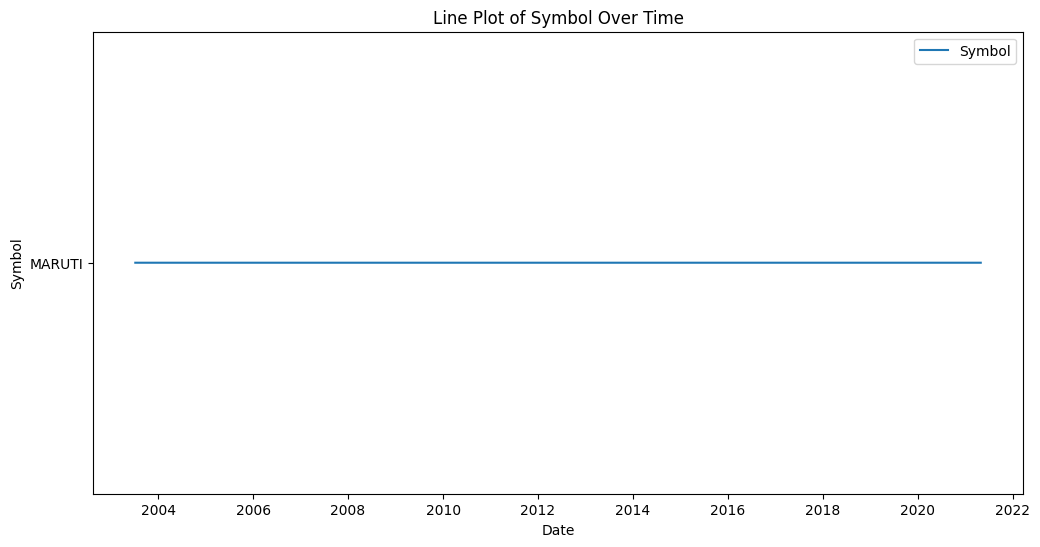

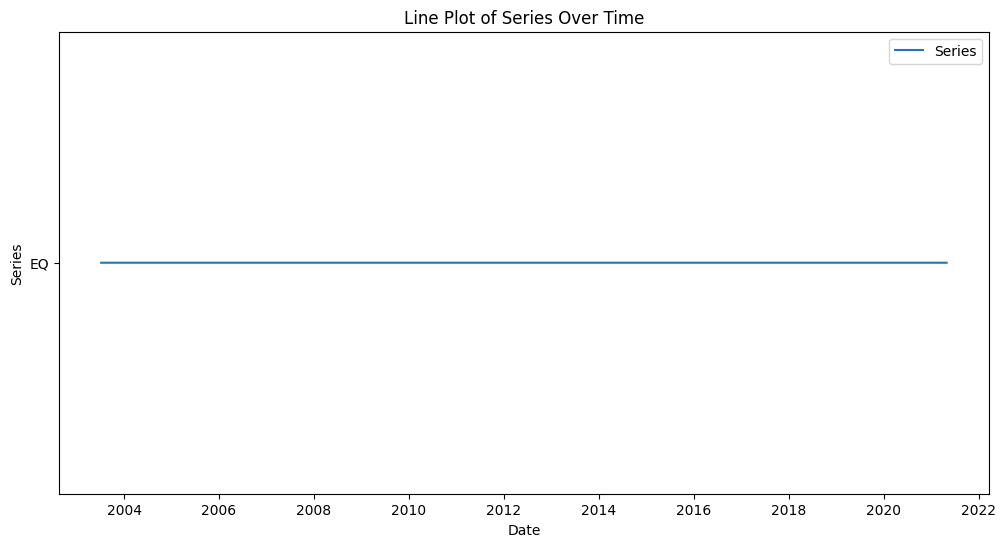

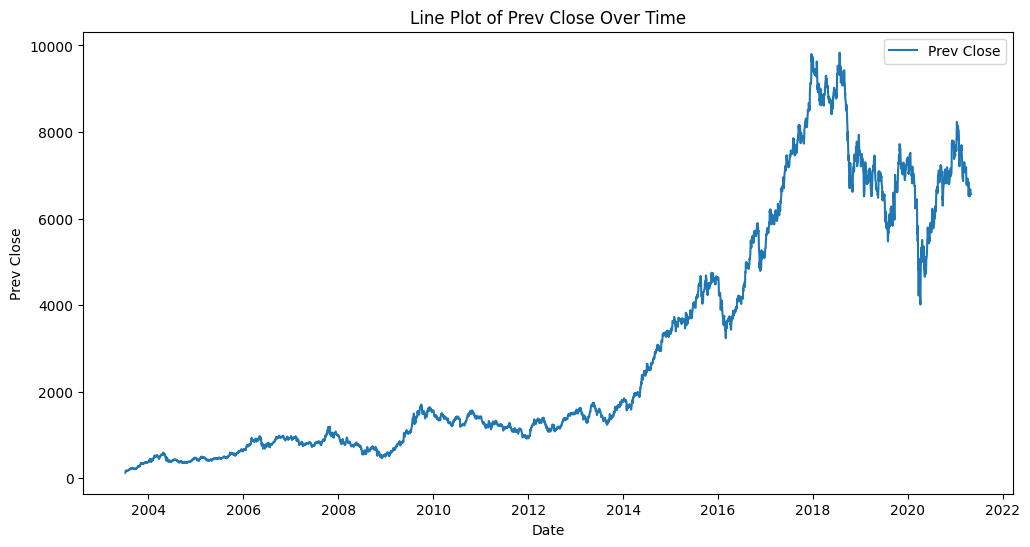

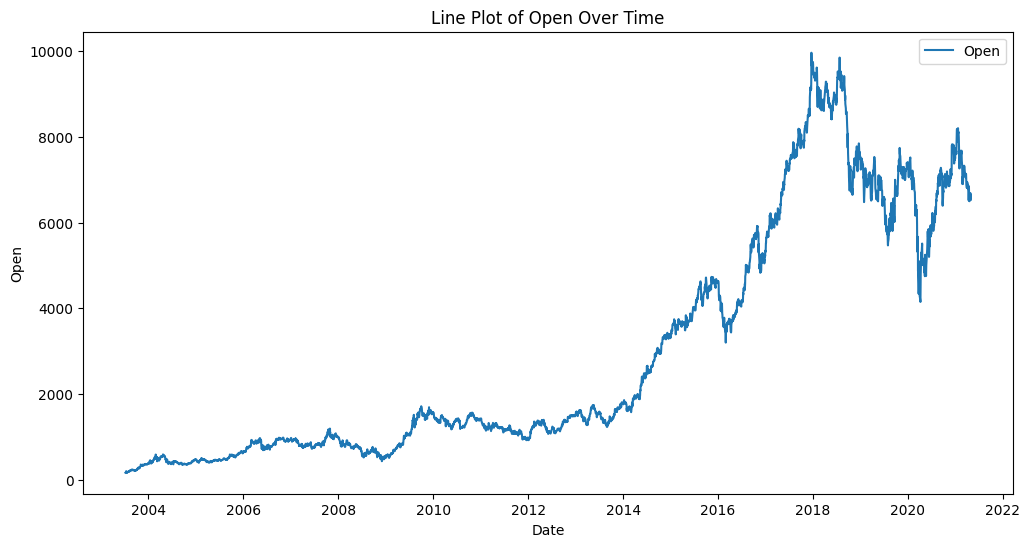

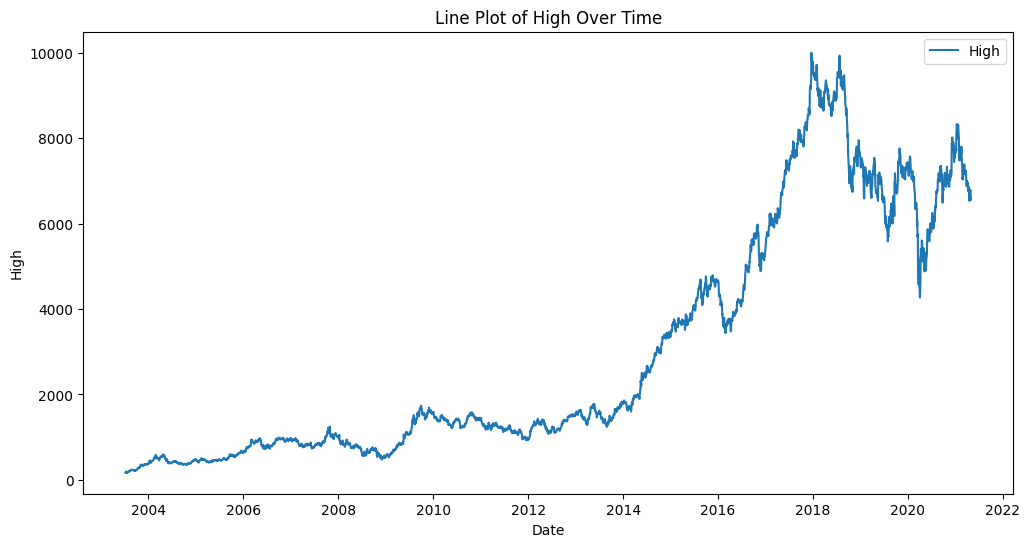

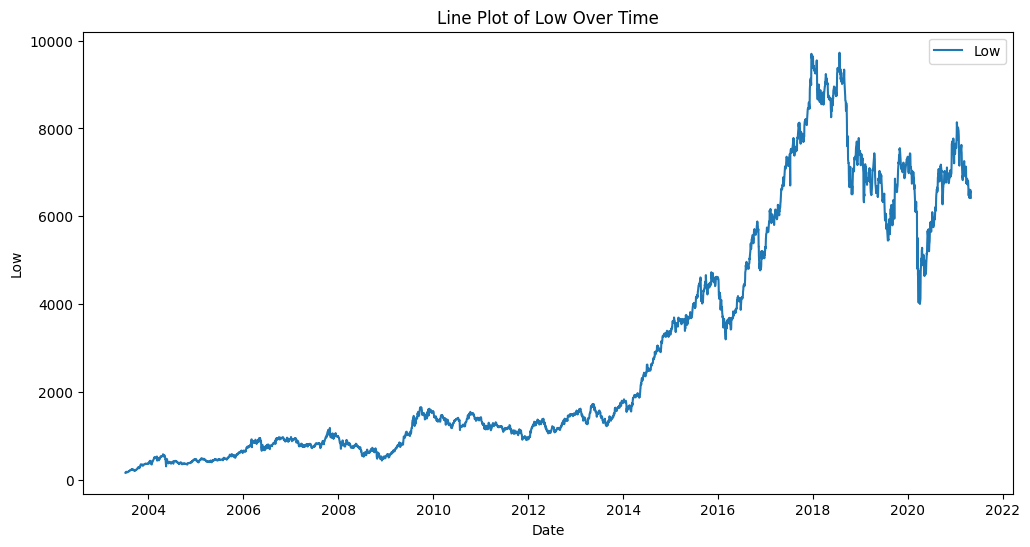

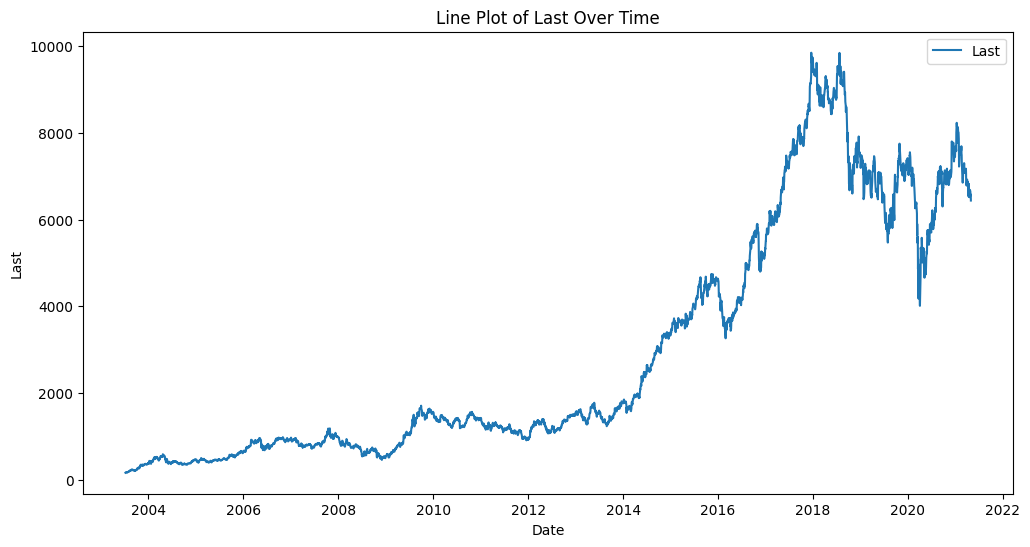

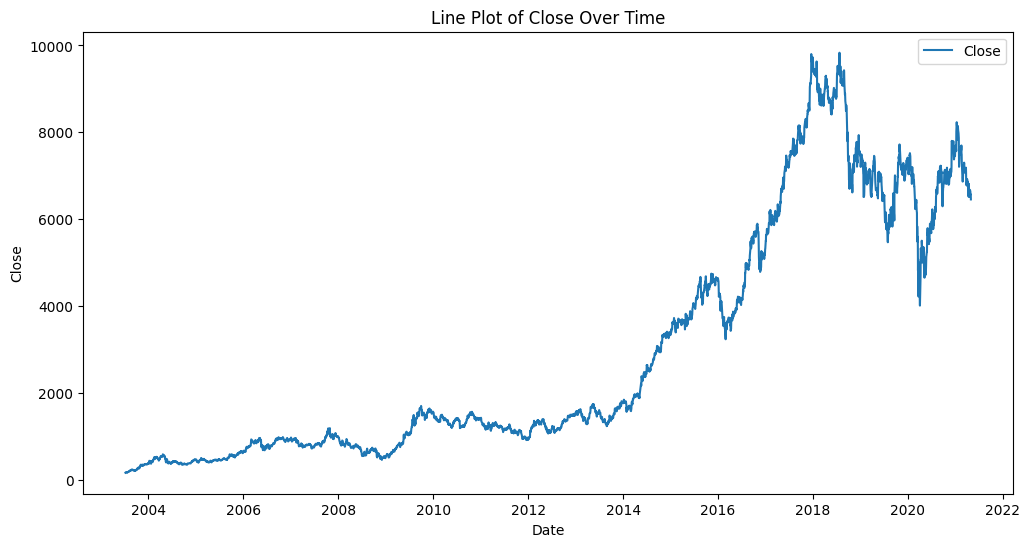

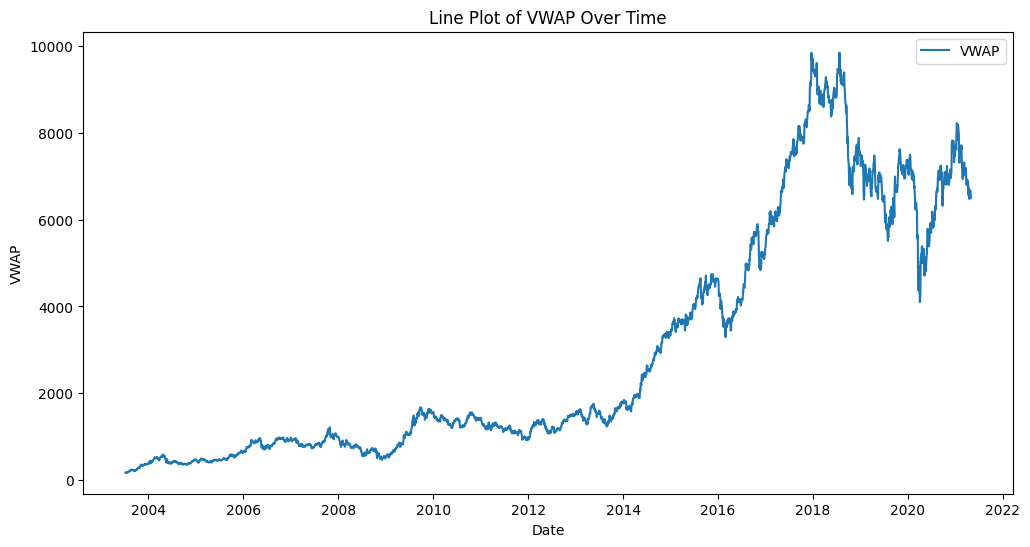

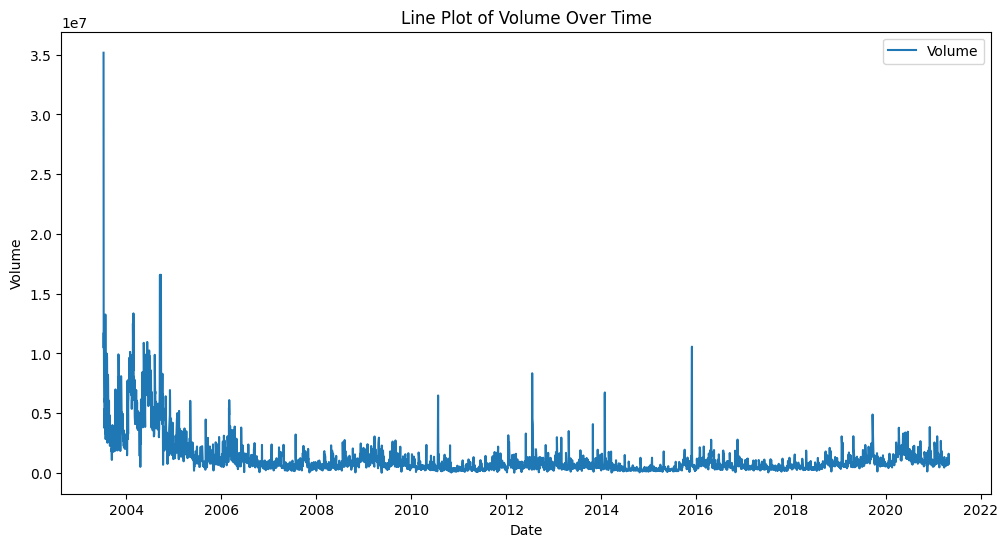

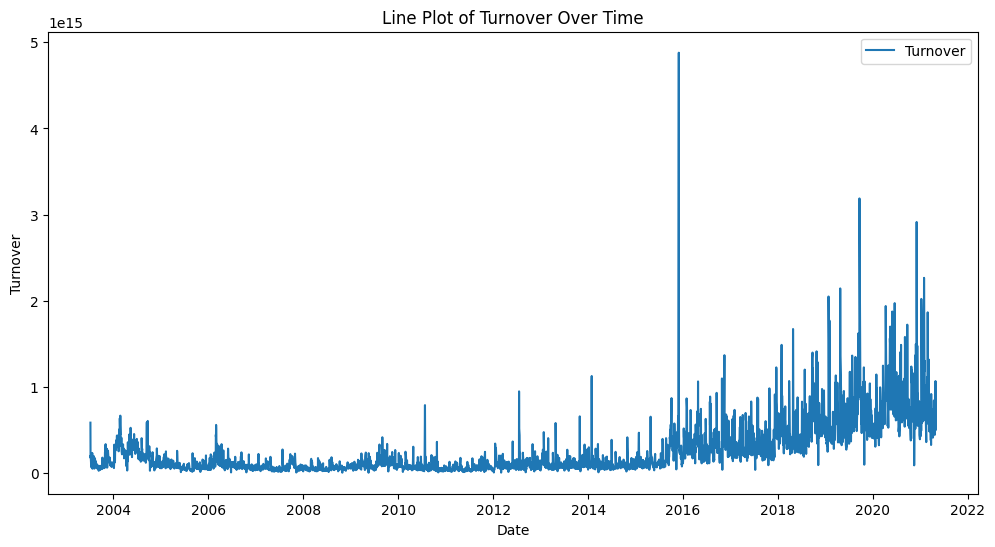

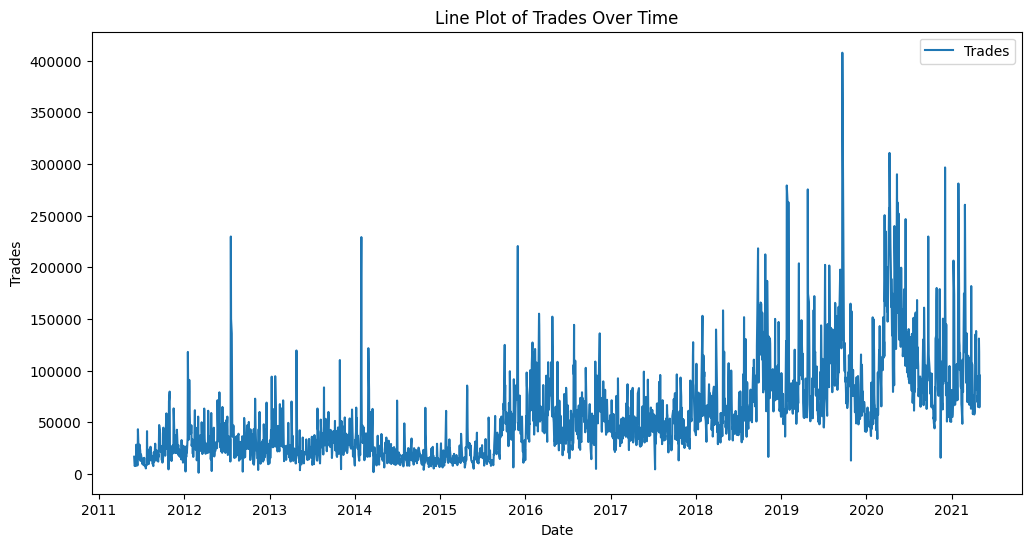

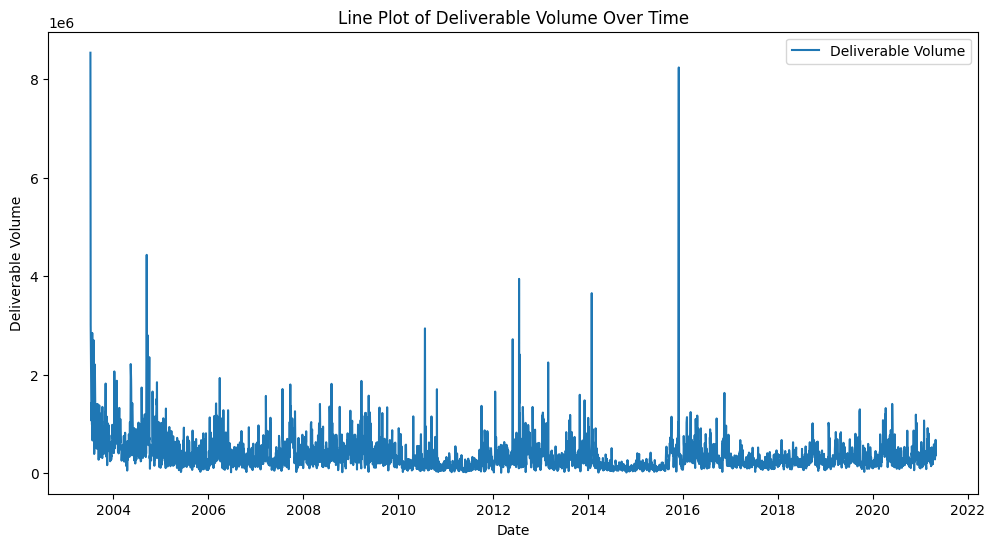

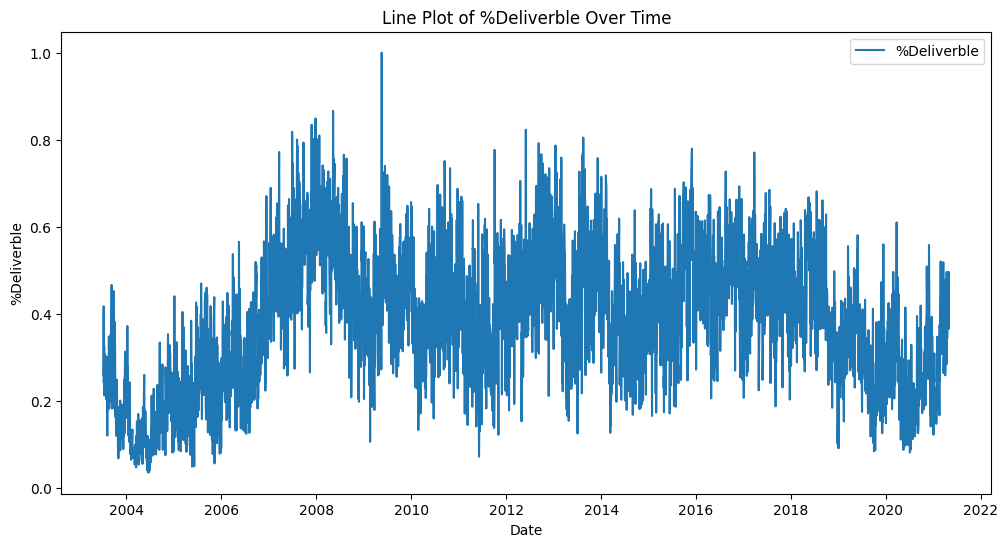

In [ ]:
# Line plots for all columns
for column in data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[column], label=column)
    plt.title(f'Line Plot of {column} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.show()

## Data Types of Time Series

Let’s discuss the time series’ data types and their influence. While discussing TS data types, there are two major types – **stationary** and **non-stationary**.

* **Stationary**: A dataset should follow the below thumb rules without having Trend, Seasonality, Cyclical, and Irregularity components of the time series.
  * The mean value of them should be completely constant in the data during the analysis.
  * The variance should be constant with respect to the time-frame
  * Covariance measures the relationship between two variables.
* **Non-Stationary**: If either the mean-variance or covariance is changing with respect to time, the dataset is called non-stationary.

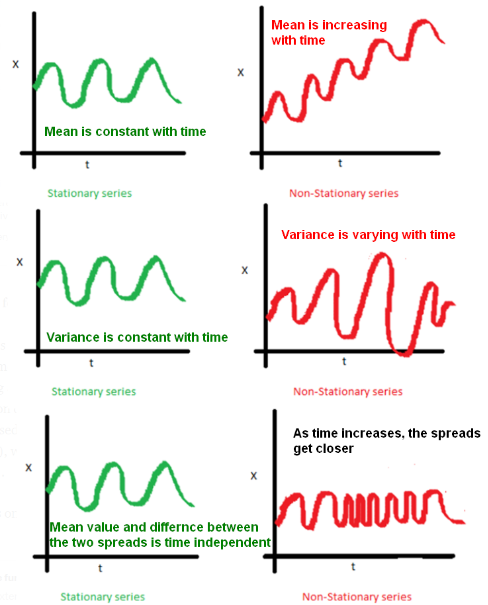

# Preprocessing Time Series Data

Time series preprocessing refers to the steps taken to clean, transform, and prepare time series data for analysis or forecasting. It involves techniques aimed at improving data quality, removing noise, handling missing values, and making the data suitable for modeling. Preprocessing tasks may include removing outliers, handling missing values through imputation, scaling or normalizing the data, detrending, deseasonalizing, and applying transformations to stabilize variance. The goal is to ensure that the time series data is in a suitable format for subsequent analysis or modeling.

* **Handling Missing Values** : Dealing with missing values in the time series data to ensure continuity and reliability in analysis.
* **Dealing with Outliers**: Identifying and addressing observations that significantly deviate from the rest of the data, which can distort analysis results.
* **Stationarity and Transformation**: Ensuring that the statistical properties of the time series, such as mean and variance, remain constant over time. Techniques like differencing, detrending, and deseasonalizing are used to achieve stationarity.

In [ ]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.00,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.00,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.60,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.60,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.30,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,MARUTI,EQ,6676.10,6690.20,6789.00,6600.00,6645.00,6638.90,6678.34,937344,6.259903e+14,74474.0,464999.0,0.4961
2021-04-27,MARUTI,EQ,6638.90,6669.95,6709.00,6542.00,6552.00,6568.75,6620.68,1610651,1.066360e+15,130986.0,588617.0,0.3655
2021-04-28,MARUTI,EQ,6568.75,6568.75,6650.00,6545.00,6581.00,6573.80,6598.62,1406270,9.279437e+14,117843.0,672435.0,0.4782


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4427 entries, 2003-07-09 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              4427 non-null   object 
 1   Series              4427 non-null   object 
 2   Prev Close          4427 non-null   float64
 3   Open                4427 non-null   float64
 4   High                4427 non-null   float64
 5   Low                 4427 non-null   float64
 6   Last                4427 non-null   float64
 7   Close               4427 non-null   float64
 8   VWAP                4427 non-null   float64
 9   Volume              4427 non-null   int64  
 10  Turnover            4427 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  4426 non-null   float64
 13  %Deliverble         4426 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 518.8+ KB


In [ ]:
data.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1971
Deliverable Volume       1
%Deliverble              1
dtype: int64

# Time Decomposition

In time series analysis, data is collected over sequential time intervals (e.g., daily, hourly, monthly).  Time series decomposition is a statistical technique that breaks down a time series into its constituent components:

* Trend: This captures the long-term underlying movement of the data, representing the general direction (upward, downward, or flat) over time.
* Seasonality: This component reflects recurring patterns within a specific time period (e.g., daily, weekly, monthly, or yearly). For instance, ice cream sales might exhibit seasonality with higher values in summer months.
* Cyclicity : While not always present, some time series exhibit cyclical patterns that repeat over a longer timeframe than seasonality. For example, economic data might show cycles related to business expansions and contractions.
* Residuals (or Noise): This component represents the remaining fluctuations in the data after accounting for trend, seasonality, and any cycles. These residuals are often assumed to be random and unpredictable.

Decomposing a time series into its components is a common step in time series analysis, and it helps in understanding the underlying patterns. The decomposition splits the time series into three main components: trend, seasonality, and residuals (noise). There are two primary methods for decomposition: additive and multiplicative.

 - **Additive Decomposition:**  This method assumes that the components add together to make the time series. It is appropriate when the seasonal variations are roughly constant through the series.

 Y[t] = T[t] + S[t] + E[t]
 - Where Y[t] is the observed time series, T[t] is the trend component, S[t] is the seasonal component, and E[t] is the residual (error/noise) component.

- **Multiplicative Decomposition:** This method assumes that the components multiply together to make the time series. It is appropriate when the seasonal variations change proportionally with the level of the time series.

 Y[t] = T[t] * S[t] * E[t]

In [ ]:
pip install pandas matplotlib statsmodels


            Symbol Series  Prev Close    Open    High     Low   Last   Close  \
Date                                                                           
2003-07-09  MARUTI     EQ      125.00  164.90  170.40  155.00  164.0  164.30   
2003-07-10  MARUTI     EQ      164.30  167.00  168.70  164.50  167.0  167.00   
2003-07-11  MARUTI     EQ      167.00  167.75  174.85  166.25  173.6  173.35   
2003-07-14  MARUTI     EQ      173.35  174.25  179.25  174.25  178.6  177.95   
2003-07-15  MARUTI     EQ      177.95  200.00  200.00  173.00  176.3  176.20   

              VWAP    Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                     
2003-07-09  165.95  35164283  5.835528e+14     NaN           8537695.0   
2003-07-10  166.74  10464179  1.744820e+14     NaN           4363947.0   
2003-07-11  172.45  11740117  2.024622e+14     NaN           3014852.0   
2003-07-14  177.91   5982324  1.064313e+14     NaN           1949217.

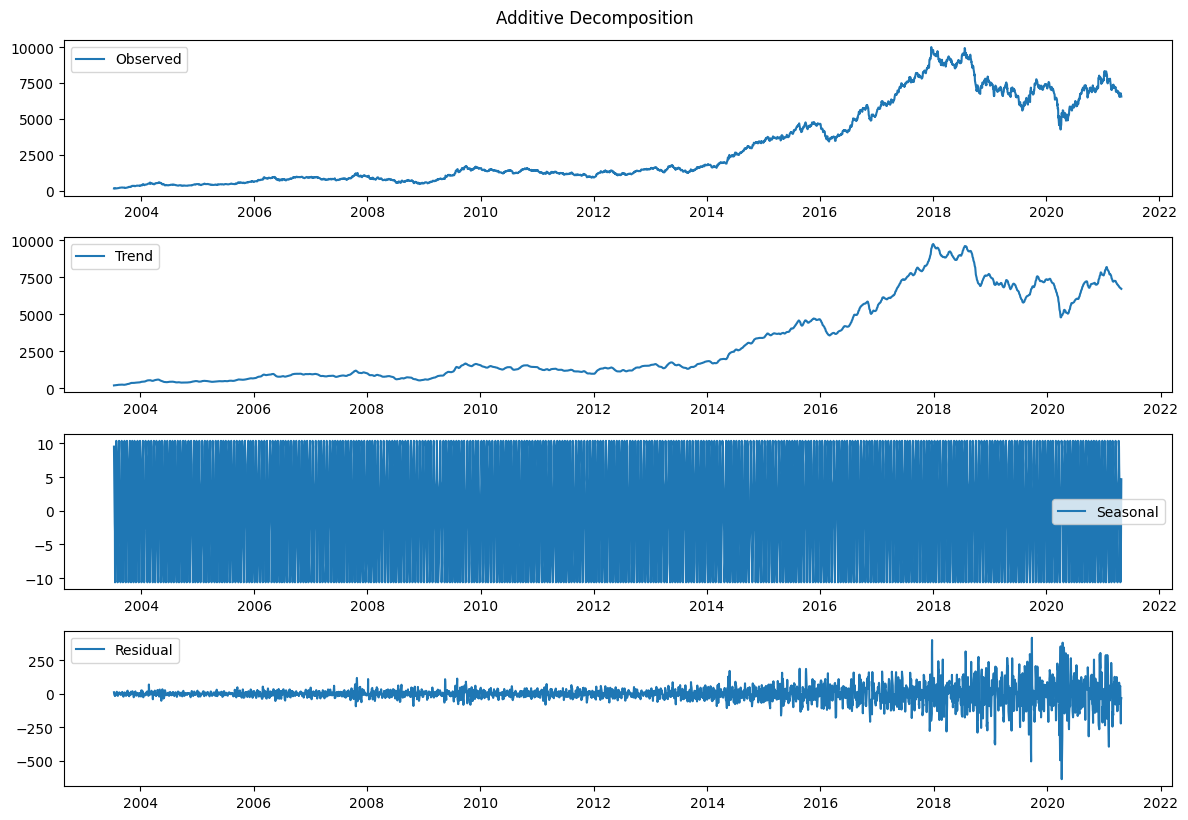

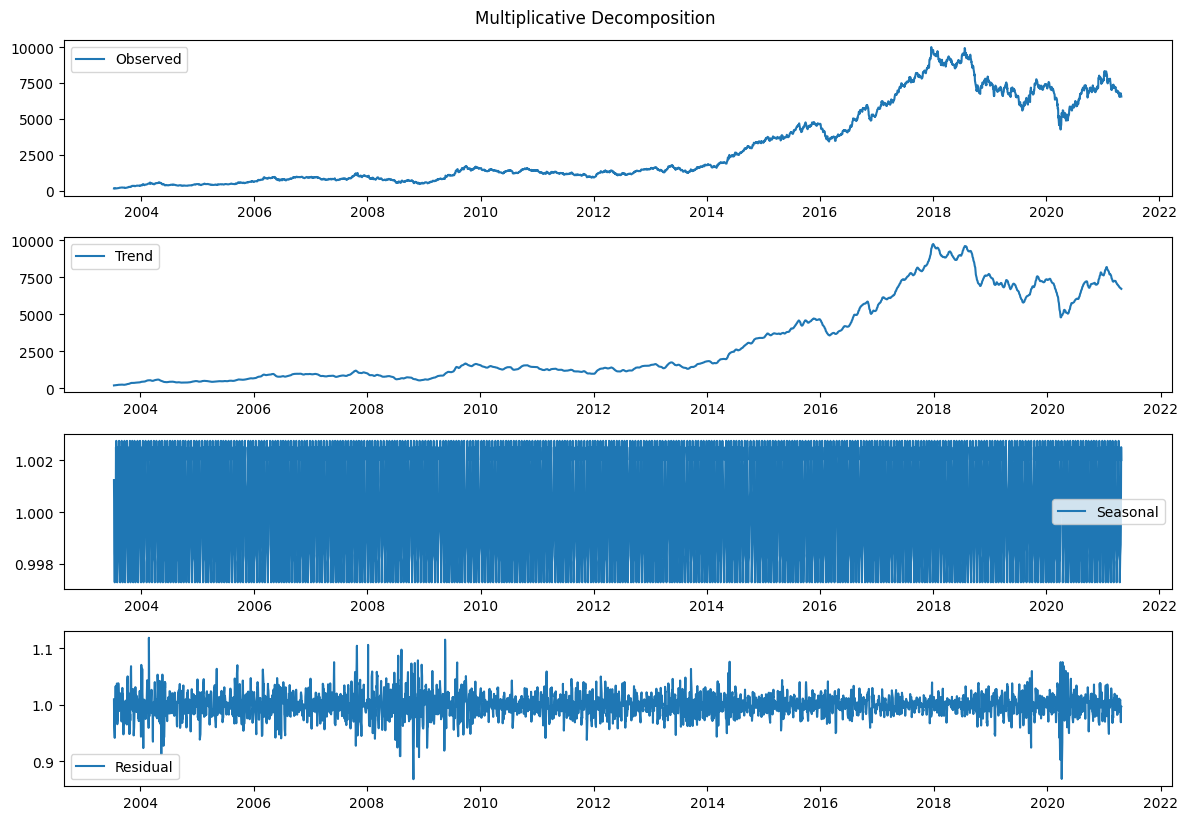

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
# Replace 'your_dataset.csv' with your actual dataset path
data = pd.read_csv('/content/MARUTI.csv', parse_dates=['Date'], index_col='Date')

# Display the first few rows of the dataset
print(data.head())

# Assume the dataset has a column 'High' which we want to decompose
ts = data['High']

# Additive Decomposition
additive_result = seasonal_decompose(ts, model='additive', period=12)

# Multiplicative Decomposition
multiplicative_result = seasonal_decompose(ts, model='multiplicative', period=12)

# Function to plot decomposition results
def plot_decomposition(result, title):
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(result.observed, label='Observed')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(result.trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(result.seasonal, label='Seasonal')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(result.resid, label='Residual')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()

# Plot the Additive Decomposition
plot_decomposition(additive_result, 'Additive Decomposition')

# Plot the Multiplicative Decomposition
plot_decomposition(multiplicative_result, 'Multiplicative Decomposition')


# Introduction to Forecasting Techniques



Forecasting techniques are methods used to predict future values based on historical data. These techniques are essential in various fields such as finance, economics, supply chain management, and meteorology, helping organizations make informed decisions. Forecasting methods can be broadly categorized into qualitative and quantitative approaches.

* Time Series Analysis: This technique analyzes historical data points collected or recorded at specific time intervals to identify patterns or trends.

* Moving Averages: A simple technique that smooths out short-term fluctuations and highlights longer-term trends by averaging data points from several time periods.

In [ ]:
data['MA'] = data['Open'].rolling(window=3).mean()


* Exponential Smoothing: Gives more weight to recent observations. It can be further categorized into:

* Simple Exponential Smoothing: Suitable for data without trend or seasonality.
* Holt’s Linear Trend Model: Captures both trend and level.
* Holt-Winters Seasonal Model: Captures trend, level, and seasonality.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(data['Open'], trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()
data['Holt_Winters'] = fitted_model.fittedvalues # Holt-Winters forecasting is a way to model and predict the behavior of a sequence of values over time—a time series


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


* Causal Models: These models assume that the variable to be forecasted is affected by one or more external factors. The most common causal model is regression analysis.

* Linear Regression: Establishes a relationship between two variables by fitting a linear equation to observed data.

In [ ]:
import statsmodels.api as sm
X = data[['Open']]
X = sm.add_constant(X)
y = data['High']
model = sm.OLS(y, X).fit()
data['Linear_Regression'] = model.fittedvalues


* Multiple Regression: Similar to linear regression but uses multiple independent variables to predict the dependent variable.



In [ ]:
X = data[['High', 'Low']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
data['Multiple_Regression'] = model.fittedvalues


## Forecasting Methods


**Forecasting Methods:** Understanding the Basics
Forecasting is the art and science of predicting future values from past data. It's crucial in various fields like finance, business, and weather prediction. Here's a breakdown of three basic forecasting methods:

**1. Naive Method:**

**Concept:** The naive method assumes that the next value in the series will be the same as the most recent observation. In simpler terms, it predicts that tomorrow will be just like today!

**Formula:** F(t+1) = Y(t) (where F(t+1) is the forecast for time t+1 and Y(t) is the actual value at time t)

**Ease of Use:** Extremely simple to implement, requiring no calculations.

**Limitations:**
* Ignores any trends or seasonality in the data.
* Not very accurate for most time series data.
* Only useful for situations where the data is relatively flat and unchanging.

**2. Simple Average Method:**

**Concept:** This method takes the average of all past observations to predict the next value. It assumes a constant average over time.

**Formula:** F(t+1) = (Y(1) + Y(2) + ... + Y(t)) / t (where F(t+1) is the forecast for time t+1, Y(i) is the actual value at time i, and t is the total number of observations)

**Ease of Use:** Easy to understand and implement, requiring basic averaging calculations.

**Limitations:**
* Ignores trends and seasonality present in the data.
* May not be accurate for data with significant fluctuations.
* Assigns equal weight to all past observations, which might not be ideal for recent data being more relevant.

**3. Moving Average Method:**

**Concept:** This method takes the average of a specific number of most recent observations to predict the next value. It puts more weight on recent data, capturing recent trends better than the simple average.
**Formula:** F(t+1) = (Y(t-n+1) + Y(t-n+2) + ... + Y(t)) / n (where F(t+1) is the forecast for time t+1, Y(i) is the actual value at time i, t is the current time, and n is the number of periods used for the average)

**Ease of Use:** Straightforward to implement, but choosing the optimal window size (n) can be challenging.

**Limitations:**
* May not capture long-term trends effectively depending on the window size.
* Can be overly sensitive to recent fluctuations, especially with small window sizes.
* Choosing the right window size (n) is crucial for accuracy. A large n might miss recent trends, while a small n might be too sensitive to noise.



# Autoregressive Integrated Moving Average (ARIMA)

The Autoregressive Integrated Moving Average (ARIMA) model is a popular and powerful method for time series forecasting. It combines three main components: autoregression (AR), differencing (I), and moving average (MA). ARIMA is especially useful for modeling and forecasting time series data that shows evidence of non-stationarity, where statistical properties such as the mean and variance change over time.


**Components of ARIMA**
* Autoregression (AR): This component uses the dependent relationship between an observation and a number of lagged observations (previous time steps). The AR part of ARIMA is denoted by p, which represents the number of lag observations included in the model.

AR model of order p:






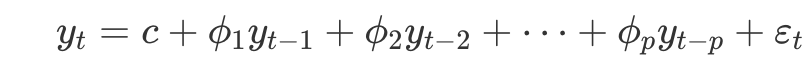

**Integrated (I):** This component involves differencing the observations to make the time series stationary, which means the statistical properties of the series are constant over time. The d in ARIMA represents the number of differencing transformations applied to the series.



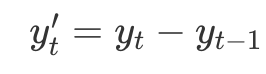

**Moving Average (MA):** This component models the relationship between an observation and a residual error from a moving average model applied to lagged observations.

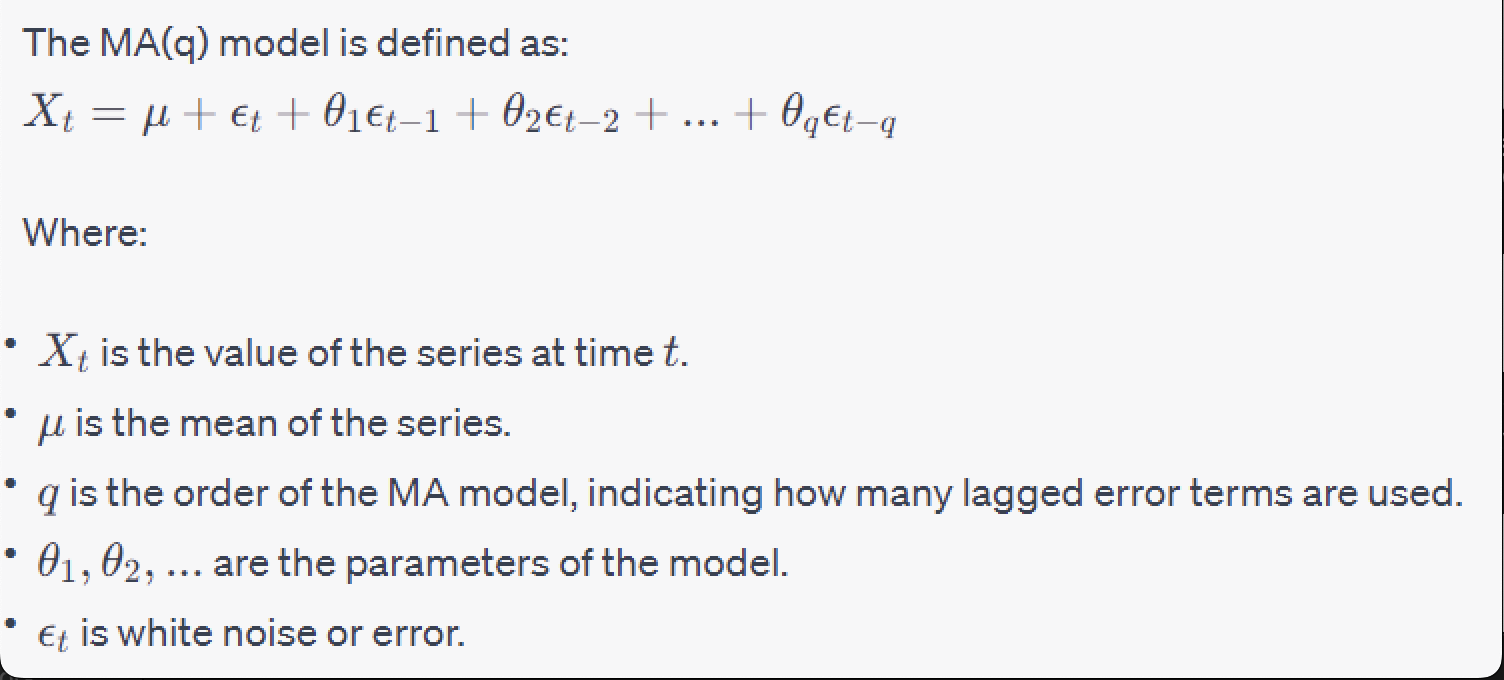

## ARIMA Model Notation
The ARIMA model is typically denoted as ARIMA(p, d, q), where:

* p is the number of lag observations in the autoregression model.
* d is the degree of differencing needed to make the series stationary.
* q is the size of the moving average window.


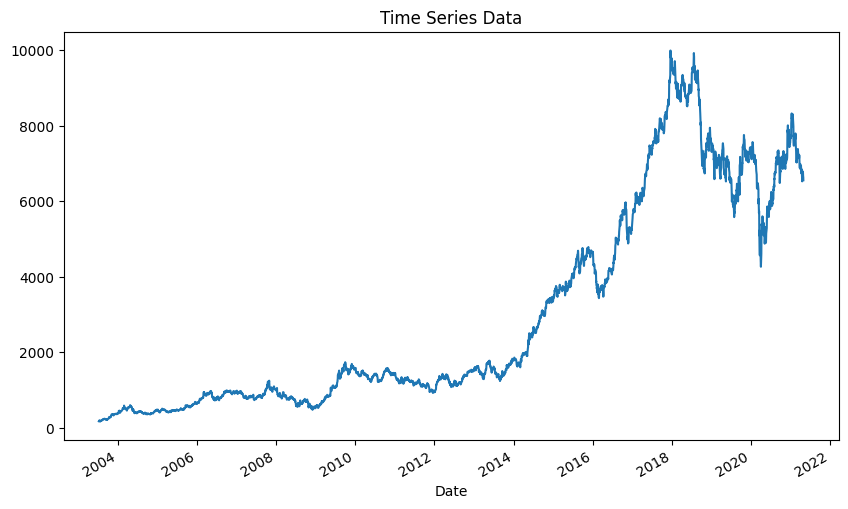

ADF Statistic: -0.824226026088089
p-value: 0.8119020817299398


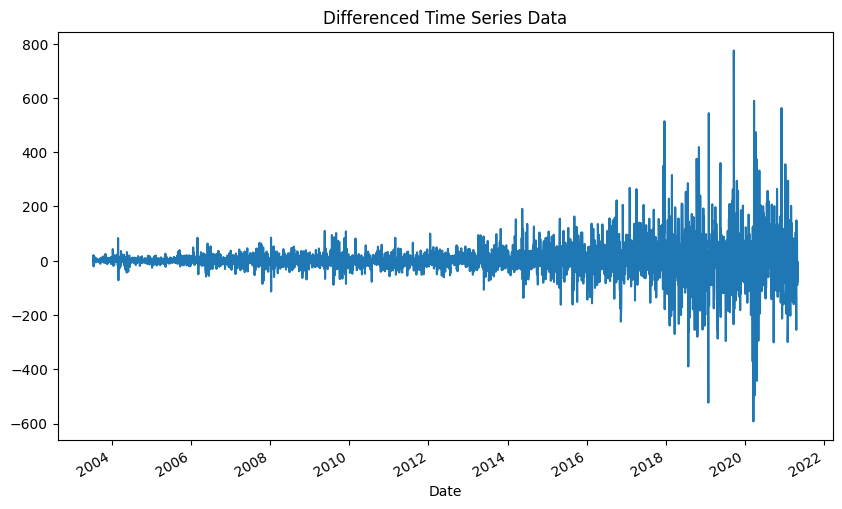

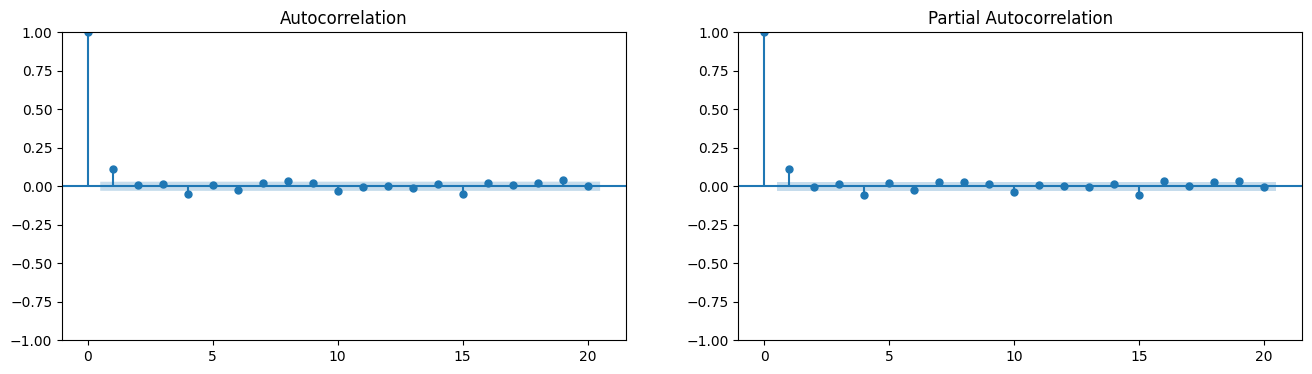

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 4427
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -24556.369
Date:                Fri, 17 May 2024   AIC                          49118.738
Time:                        09:16:31   BIC                          49137.924
Sample:                             0   HQIC                         49125.504
                               - 4427                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0358      0.052      0.683      0.495      -0.067       0.139
ma.L1          0.0788      0.052      1.507      0.132      -0.024       0.181
sigma2      3863.1889     23.694    163.048      0.0

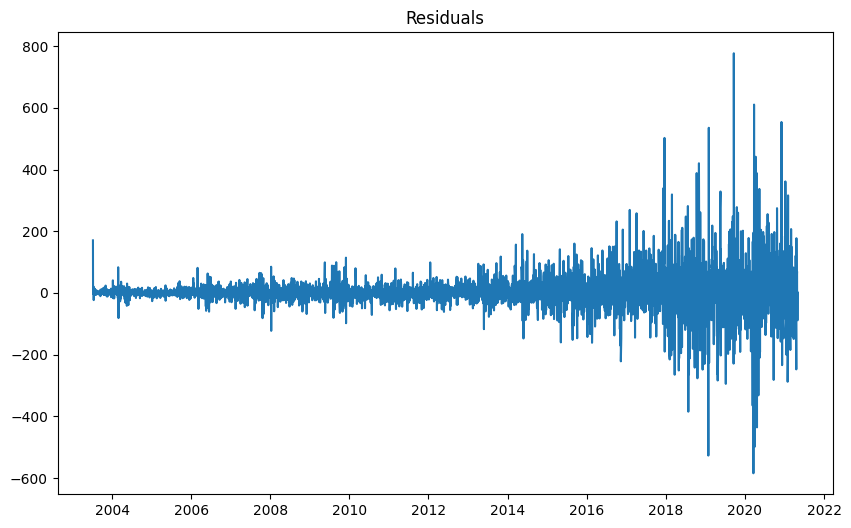

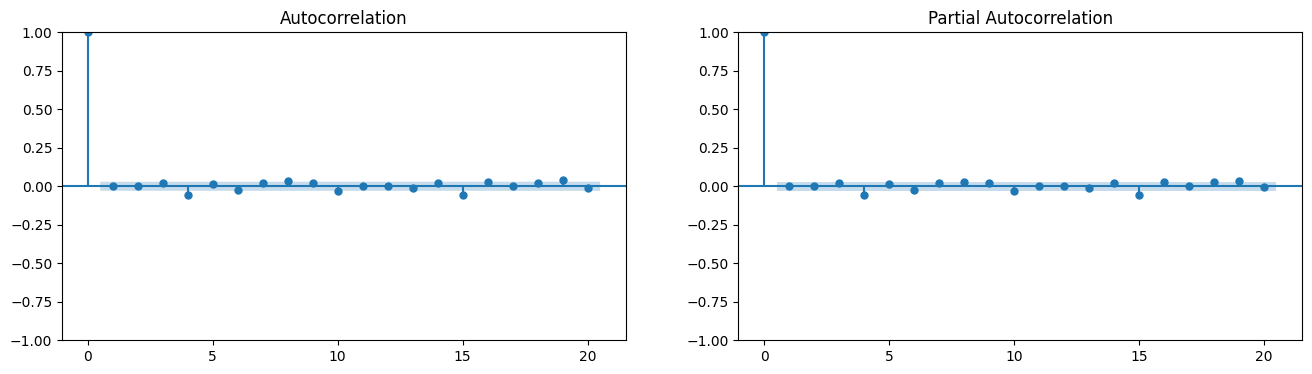

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Load dataset
# Replace 'your_dataset.csv' with your actual dataset path
data = pd.read_csv('/content/MARUTI.csv', parse_dates=['Date'], index_col='Date')

# Plot the time series
data['High'].plot(figsize=(10, 6))
plt.title('Time Series Data')
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(data['High'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Differencing to make the series stationary if necessary
data_diff = data['High'].diff().dropna()

# Plot the differenced data
data_diff.plot(figsize=(10, 6))
plt.title('Differenced Time Series Data')
plt.show()

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
fig = sm.graphics.tsa.plot_acf(data_diff, lags=20, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(data_diff, lags=20, ax=axes[1])
plt.show()

# Set the p, d, q parameters based on the ACF and PACF plots
p = 1  # AR parameter
d = 1  # Differencing parameter
q = 1  # MA parameter

# Fit ARIMA model
model = ARIMA(data['High'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot the residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Check the residuals for white noise
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
fig = sm.graphics.tsa.plot_acf(residuals, lags=20, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(residuals, lags=20, ax=axes[1])
plt.show()

# Forecast


##Model Evaluation and Validation

Model Evaluation and Validation for Time Series Forecasting
Evaluating the performance of time series models is crucial to ensure that the predictions are accurate and reliable. Several metrics are commonly used to assess the performance of these models, including Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). Additionally, cross-validation techniques help to ensure the model's generalizability.



# Model Evaluation and Validation

### **Mean Absolute Error (MAE)**

* MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.
It is calculated as the average of the absolute differences between the predicted values and the actual values.

Formula:


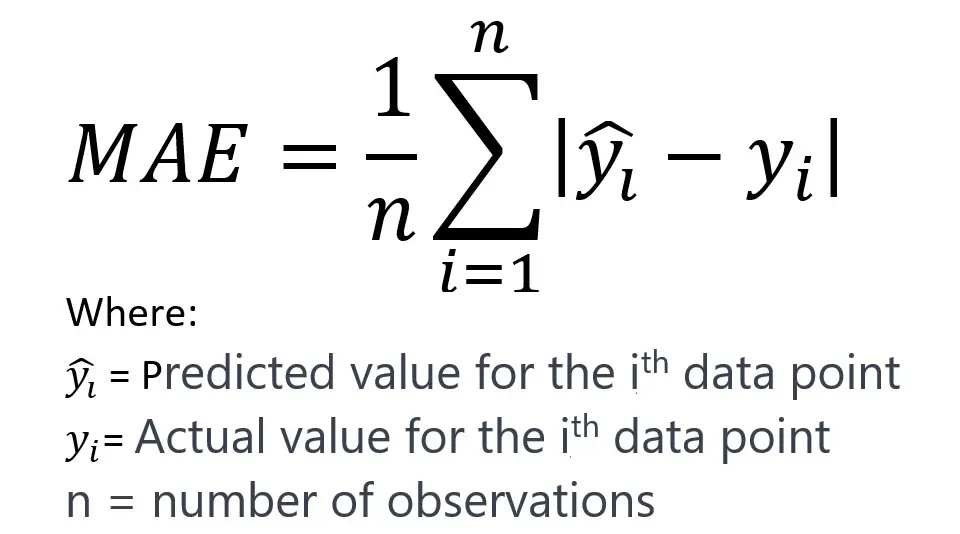

### **Mean Squared Error (MSE)**

* MSE measures the average of the squares of the errors, giving more weight to larger errors.
It is calculated as the average of the squared differences between the predicted values and the actual values.

Formula:

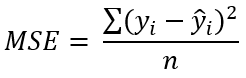

MSE is more sensitive to outliers than MAE due to the squaring of errors.

###Root Mean Squared Error (RMSE)

* RMSE is the square root of the MSE and provides an error metric that is in the same units as the original data.

Formula:


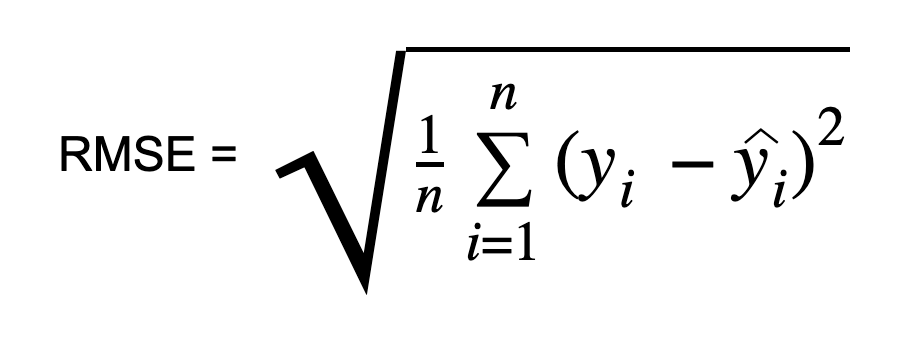

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming y_true and y_pred are your actual and predicted values
y_true = data['High'].values[-forecast_steps:]  # Actual values
y_pred = forecast  # Predicted values

# Mean Absolute Error
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE: {mae}')

# Mean Squared Error
mse = mean_squared_error(y_true, y_pred)
print(f'MSE: {mse}')

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')


MAE: 156.55114678098258
MSE: 32927.15088116626
RMSE: 181.45839986389788


###**Cross-Validation in Time Series**
Cross-validation is a technique used to evaluate the model's performance by partitioning the data into training and testing sets multiple times. In time series, the order of the data matters, so traditional cross-validation methods are not suitable. Instead, you can use time series-specific cross-validation methods.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Assuming X is your feature set and y is your target variable
X = data.index.values
y = data['High'].values

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = ARIMA(y_train, order=(p, d, q))
    model_fit = model.fit()

    predictions = model_fit.forecast(steps=len(y_test))

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    print(f'Train on {len(train_index)}, test on {len(test_index)}')
    print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')


Train on 742, test on 737
MAE: 124.27480135189823, MSE: 24022.34424576418, RMSE: 154.99143281408874
Train on 1479, test on 737
MAE: 222.92539892959232, MSE: 68965.12880279003, RMSE: 262.61212615336336
Train on 2216, test on 737
MAE: 913.6408732753802, MSE: 1547013.4275010547, RMSE: 1243.789945087616
Train on 2953, test on 737
MAE: 2268.022873974728, MSE: 8678777.467065131, RMSE: 2945.976487866991
Train on 3690, test on 737
MAE: 1759.2172131151651, MSE: 3869714.5148981824, RMSE: 1967.1589958359193


# Seasonal ARIMA (SARIMA) Model


The Seasonal ARIMA (SARIMA) model is an extension of the ARIMA model that explicitly supports univariate time series data with a seasonal component. Seasonality is a repeating pattern or cycle in the data that occurs at regular intervals, such as monthly, quarterly, or yearly.



**SARIMA Model Components**

#### **Non-seasonal part (p, d, q):**
- p: Number of lag observations included in the model (lag order).
- d: Number of times that the raw observations are differenced (degree of differencing).
- q: Size of the moving average window (order of moving average).

#### **Seasonal part (P, D, Q, s):**
- P: Number of seasonal lag observations included in the model (seasonal lag order).
- D: Number of seasonal differencing (degree of seasonal differencing).
- Q: Size of the seasonal moving average window (order of seasonal moving average).
- s: The length of the seasonal cycle (e.g., 12 for monthly data with yearly seasonality).




### **Step-by-Step SARIMA Model Implementation**

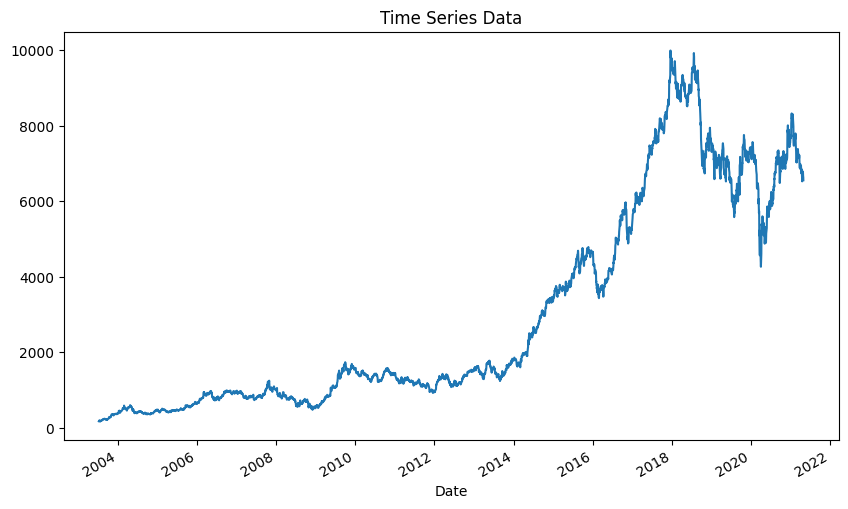

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/MARUTI.csv', parse_dates=['Date'], index_col='Date')

# Plot the time series
data['High'].plot(figsize=(10, 6))
plt.title('Time Series Data')
plt.show()


 ### **Check for Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['High'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -0.824226026088089
p-value: 0.8119020817299398


### **Determine SARIMA Parameters using ACF and PACF**

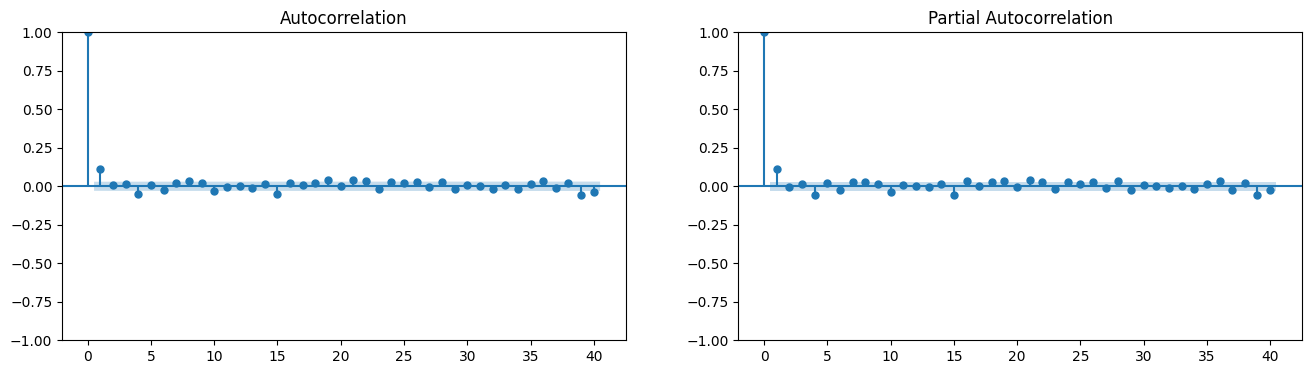

In [ ]:
import statsmodels.api as sm

# Differencing to make the series stationary
data_diff = data['High'].diff().dropna()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
fig = sm.graphics.tsa.plot_acf(data_diff, lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(data_diff, lags=40, ax=axes[1])
plt.show()


### **Fit the SARIMA Model**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Set the parameters for the SARIMA model
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 12

# Fit the SARIMA model
model = SARIMAX(data['High'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               High   No. Observations:                 4427
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -24521.499
Date:                            Fri, 17 May 2024   AIC                          49052.997
Time:                                    09:57:23   BIC                          49084.960
Sample:                                         0   HQIC                         49064.270
                                           - 4427                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0033      0.053      0.062      0.951      -0.101       0.107
ma.L1          0.1094      0.053   

### **Evaluate the Model**

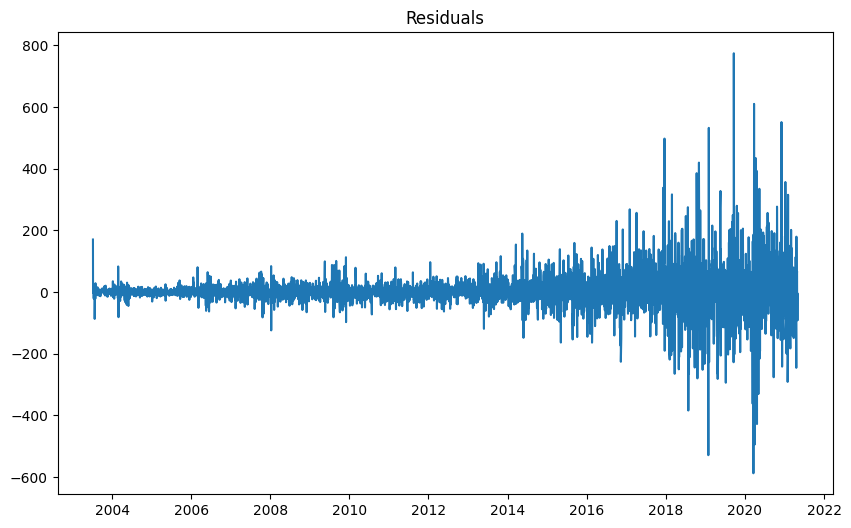

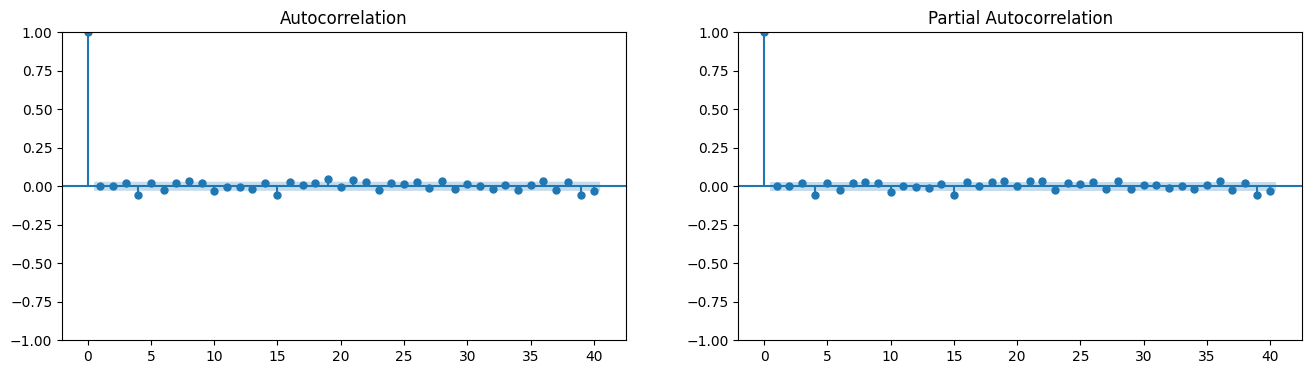

MAE: 33.356858912208644
MSE: 3865.468282036518
RMSE: 62.172890249983695


In [ ]:
# Plot the residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Check the residuals for white noise
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=axes[1])
plt.show()

# Calculate performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming y_true and y_pred are your actual and predicted values for the validation period
# Here we use the in-sample fitted values as an example
y_true = data['High'].values[-len(residuals):]
y_pred = model_fit.fittedvalues[-len(residuals):]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


# Advanced Techniques

### Exponential Smoothing Methods

* Exponential smoothing methods are widely used for forecasting time series data. These methods assign exponentially decreasing weights to past observations, with more recent observations receiving higher weights. There are several variants of exponential smoothing methods, including:

- **Simple Exponential Smoothing (SES):** Suitable for time series data with no trend or seasonality.
- **Double Exponential Smoothing (Holt's method):** Extends SES to account for trend in the data.
- **Triple Exponential Smoothing (Holt-Winters method):** Incorporates both trend and seasonality into the forecasts.

### **Prophet**

* Prophet is an open-source forecasting tool developed by Facebook. It is designed to handle time series data with strong seasonal patterns and provides a simple yet effective way to make forecasts.
* Some key features of Prophet include:

1. Automatic detection of seasonality patterns.
2. Ability to handle missing data and outliers.
3. Flexibility to incorporate custom seasonalities and holidays.
4. Intuitive interface and easy-to-use API.

### **LSTM (Long Short-Term Memory) Networks**

LSTM networks are a type of recurrent neural network (RNN) architecture that is well-suited for sequence prediction tasks, including time series forecasting. LSTMs are capable of capturing long-term dependencies in sequential data and have been successfully applied to various time series forecasting problems.

**Key features of LSTM networks include:**

1. Ability to learn from and remember long sequences of data.
2. Flexibility to handle complex temporal patterns and nonlinear relationships.
3. Capability to automatically extract relevant features from raw input data.
4. Potential for parallel training and efficient computation.